<a href="https://colab.research.google.com/github/ariefwcks303/MachineLearningFromScratch/blob/main/Studi_Kasus_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
#numpy (np) → pengolahan data numerik & array
import numpy as np

#pandas (pd) → membuat, membaca, serta mengelola data tabular (DataFrame)
import pandas as pd

#atplotlib.pyplot (plt) → visualisasi data (grafik/plot)
import matplotlib.pyplot as plt

#seaborn (sns) → visualisasi data statistik yang lebih informatif dan gaya lebih bagus
import seaborn as sns


#Import Dataset
#Mengimpor fungsi untuk mengambil dataset California Housing (dataset regresi bawaan sklearn)
from sklearn.datasets import fetch_california_housing

#Import Model Selection
#train_test_split → membagi data menjadi data latih & data uji
#cross_val_score → validasi model dengan cross-validation
#learning_curve → melihat kurva pembelajaran (bias & variance model)
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

#Import Preprocessing
#StandardScaler → normalisasi fitur agar mean = 0 dan std = 1
#(supaya model bekerja lebih optimal)
from sklearn.preprocessing import StandardScaler

#Import Metrics
#Fungsi evaluasi model:
#mean_squared_error (MSE) → metrik regresi (mengukur error kuadrat)
#r2_score → metrik regresi (seberapa baik model menjelaskan variansi data)
#accuracy_score → metrik klasifikasi (akurasi)
#confusion_matrix → evaluasi klasifikasi berdasarkan prediksi benar/salah tiap kelas
#classification_report → ringkasan precision, recall, f1-score setiap kelas
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

#Mengimpor model Decision Tree untuk regresi (memprediksi nilai kontinu seperti harga rumah)
from sklearn.tree import DecisionTreeRegressor

Kode ini mempersiapkan:

✔ Library manipulasi data

✔ Library visualisasi

✔ Dataset California Housing

✔ Tools pembagian data & evaluasi model

✔ Model Decision Tree untuk regresi

##Memuat Dataset untuk Kasus Overfitting

In [2]:
# Load dataset California Housing
data = fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

Mengambil dataset California Housing dari sklearn

- (X) = Membuat DataFrame pandas untuk fitur (input model)

- (y) = Membuat Series pandas untuk target (output model)

In [3]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Membuat objek StandardScaler

      -  Fungsi scaler ini untuk menormalisasi fitur numerik
      -  Normalisasi penting karena beberapa model sensitif pada skala data


1. fit() → menghitung nilai mean dan standard deviation dari setiap fitur pada dataset X

2. transform() → mengubah (menstandarkan) seluruh data menggunakan nilai yang dihitung

Hasilnya disimpan ke dalam variabel X_scaled sebagai array numpy

In [4]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Kode tersebut membagi data yang sudah dinormalisasi menjadi 70% data latih dan 30% data uji secara acak namun konsisten.

In [5]:
#Check Proporsi setelah pembagian dataset
print("Proporsi setelah pembagian dataset:")
print("Data latih:", len(X_train) / len(X))
print("Data uji:", len(X_test) / len(X))

Proporsi setelah pembagian dataset:
Data latih: 0.7
Data uji: 0.3


In [6]:
X_train.shape

(14448, 8)

In [7]:
X_test.shape

(6192, 8)

In [8]:
# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=50 ,random_state=42)

Membuat model Decision Tree Regressor dengan kedalaman maksimum 50 dan hasil pembagian cabang yang konsisten (reproducible) menggunakan random_state=42.

In [9]:
# Inisialisasi model Decision Tree Regressor
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, random_state=42)

Kode tersebut digunakan untuk melatih model Decision Tree menggunakan data input X_train dan target y_train.

In [10]:
# Membuat prediksi untuk data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

→ Menghasilkan prediksi harga rumah untuk data latih menggunakan model yang sudah dilatih.

→ Menghasilkan prediksi harga rumah untuk data uji untuk mengevaluasi performa model pada data baru.

##Mendeteksi Overfitting

Overfitting terjadi ketika model bekerja sangat baik pada data latih, tetapi menunjukkan kinerja yang buruk pada data uji karena model terlalu menyesuaikan diri dengan data latih

##Evaluasi Performa pada Data Latih dan Data Uji

In [11]:
# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

→ Menghitung Mean Squared Error antara nilai asli dan nilai prediksi pada data latih.

→ Menghitung Mean Squared Error antara nilai asli dan nilai prediksi pada data uji untuk menilai kemampuan generalisasi model.

In [12]:
# Menampilkan hasil MSE
print("Mean Squared Error (MSE) pada data latih:", train_mse)
print("Mean Squared Error (MSE) pada data uji:", test_mse)

Mean Squared Error (MSE) pada data latih: 9.904697258622977e-32
Mean Squared Error (MSE) pada data uji: 0.5265256772490148


- Data latih	9.904697258622977e-32 (≈ 0)	Model menghafal data latih sempurna → Overfitting sangat tinggi

- Data uji	0.5265	Ketika diuji pada data baru, error jauh lebih tinggi, menunjukkan model tidak mampu generalisasi

Analisis

- Model Decision Tree max_depth=50 terlalu kompleks → setiap sampel pada data latih dipelajari secara detail tanpa generalisasi.

Ciri overfitting yang terlihat:

- Prediksi sangat akurat pada training set
- Prediksi kurang akurat pada test set

###Learning Curve

In [13]:
from sklearn.model_selection import learning_curve

# Fungsi untuk menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

→ Mengimpor fungsi learning_curve untuk mengevaluasi performa model berdasarkan ukuran data latih.

| Bagian Kode                        | Fungsi                                                                 |
| ---------------------------------- | ---------------------------------------------------------------------- |
| `learning_curve(...)`              | Menghitung **skor performa model** pada berbagai ukuran data pelatihan |
| `model`                            | Model yang dievaluasi (DecisionTreeRegressor)                          |
| `X_train, y_train`                 | Dataset latih yang digunakan untuk kurva pembelajaran                  |
| `cv=5`                             | Menggunakan **5-fold cross-validation**                                |
| `scoring='neg_mean_squared_error'` | Metrik evaluasi: MSE (ditampilkan dalam bentuk negatif)                |
| `n_jobs=-1`                        | Gunakan **semua core CPU** untuk mempercepat proses                    |
| `train_sizes`                      | Ukuran subset data latih yang diuji                                    |
| `train_scores`                     | Skor model untuk subset pada **data latih**                            |
| `test_scores`                      | Skor model untuk subset pada **data validasi** (cross-validation)      |


In [14]:
# Menghitung rata-rata dan standar deviasi
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

→ Menghitung rata-rata skor model pada data latih untuk setiap ukuran data, lalu mengubah nilai menjadi positif karena train_scores merupakan negatif MSE dari sklearn.

→ Menghitung rata-rata skor validasi (cross-validation) untuk setiap ukuran data uji, dan mengonversinya menjadi MSE positif juga.

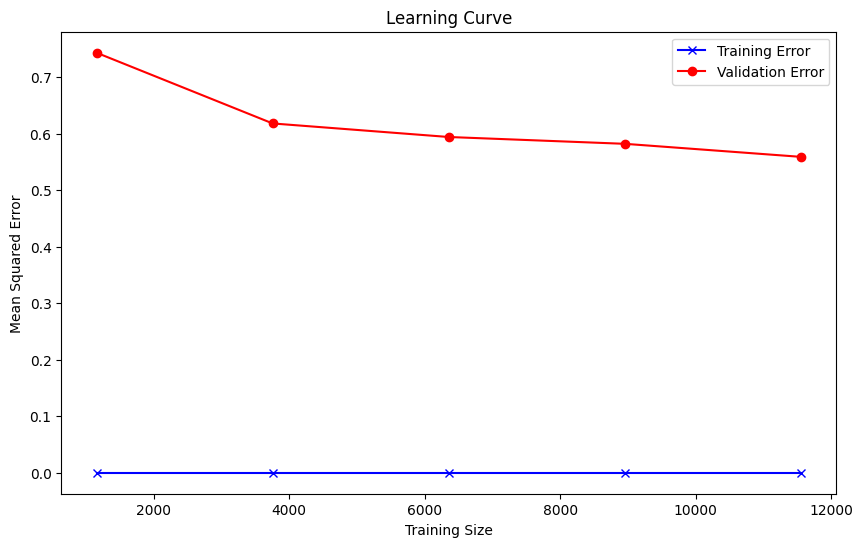

In [15]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean,'x-', color="blue", label='Training Error')
plt.plot(train_sizes, test_mean, 'o-', color="red", label='Validation Error')

plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

Pada gambar di atas, dapat dilihat bahwa learning curve menunjukkan jarak yang sangat jauh antara training error dan cross-validation error, hal ini memberikan indikasi jelas bahwa terjadi overfitting.

Setelah mengidentifikasi bahwa model mengalami overfitting, langkah selanjutnya adalah mencari solusi untuk memperbaiki masalah tersebut dan meningkatkan kemampuan model dalam memprediksi data baru.

##Mengatasi Overfitting

Mengatasi overfitting adalah langkah penting untuk memastikan model machine learning Anda dapat bekerja dengan baik tidak hanya pada data latih, tetapi juga dalam data baru. Overfitting terjadi ketika model terlalu menyesuaikan diri dengan data latih sehingga menghasilkan performa yang sangat baik pada data tersebut, tetapi buruk dalam data uji.

###Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score

→ Mengimpor fungsi cross_val_score dari sklearn, yang digunakan untuk melakukan evaluasi model dengan Cross-Validation.

In [17]:
# Menggunakan cross-validation dengan 5 fold
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

- Kode cross_val_score melakukan proses validasi silang (cross-validation) sebanyak 5 kali pembagian (cv=5) pada data pelatihan (X_train, y_train).

- Setiap kali, data dibagi menjadi dua bagian: satu bagian untuk melatih model dan bagian lainnya digunakan untuk menguji model. Proses ini diulang sampai semua bagian data mendapat giliran sebagai data uji.

- Parameter scoring='neg_mean_squared_error' menunjukkan bahwa metrik evaluasi yang digunakan adalah Mean Squared Error (MSE), tetapi dalam bentuk negatif sesuai standar sklearn. Hasil proses ini disimpan pada variabel cv_score berupa array yang berisi 5 nilai error dari setiap fold, sehingga dapat digunakan untuk mengetahui rata-rata performa model dan kestabilannya.

- Semakin konsisten nilai antar-fold, semakin stabil model dan kecil kemungkinan terjadi overfitting.

In [18]:
# Menampilkan hasil cross-validation
print(f'cross_validation MSE: {-cv_score.mean():.3f}')

cross_validation MSE: 0.556


Cross Validation MSE: 0.556

Artinya:

- Dari proses cross-validation, model diuji pada 5 bagian data secara bergiliran

-  Rata-rata nilai Mean Squared Error (MSE) yang didapat adalah 0.556

- Karena MSE adalah ukuran error prediksi, semakin kecil nilainya → semakin baik model memprediksi data

Dengan nilai 0.556, model kita termasuk performa cukup baik namun masih dapat ditingkatkan.

###Regularization (Max Depth, Min Samples Split, Min Samples Leaf)

Regularisasi dilakukan dengan mengurangi kedalaman pohon keputusan (max_depth) menjadi 5. Ini bertujuan agar model tidak terlalu rumit dan lebih mampu menggeneralisasi data baru.

In [19]:
# Membuat model Decision Tree dengan kedalaman yang lebih kecil
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

- DecisionTreeRegressor(max_depth=5, random_state=42) =	Membuat model Decision Tree untuk regresi dengan batas maksimum kedalaman pohon = 5 agar model tidak terlalu kompleks dan menghindari overfitting. random_state=42 memastikan hasil yang sama setiap kali dijalankan.


- model_reg.fit(X_train, y_train)	= Melatih model menggunakan data latih (X_train sebagai fitur, y_train sebagai target).

In [20]:
# Evaluasi pada data latih dan uji
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

1. model_reg.predict(X_train) ▶	Menghasilkan prediksi nilai target untuk dataset latih menggunakan model yang telah dilatih

2. model_reg.predict(X_test) ▶	Menghasilkan prediksi nilai target untuk dataset uji
3. y_train_pred_reg ▶	Menyimpan hasil prediksi untuk data latih
4. y_test_pred_reg ▶ Menyimpan hasil prediksi untuk data uji

In [21]:
# Hitung MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

1. train_mse_reg ▶ Menghitung Mean Squared Error antara nilai sebenarnya (y_train) dan hasil prediksi model (y_train_pred_reg) pada data latih.

2. test_mse_reg ▶ Menghitung MSE pada data uji dengan membandingkan y_test dan y_test_pred_reg.

In [22]:
#Show result
print(f"MSE pada data latih: {train_mse_reg:.3f}")
print(f"MSE pada data uji: {test_mse_reg:.3f}")

MSE pada data latih: 0.493
MSE pada data uji: 0.521


In [23]:
#Tampilkan hasil decission tree sebelum di regularisasi lalu bandingkan di dataframe
print(f"Mean Squared Error (MSE) pada data latih:", train_mse)
print(f"Mean Squared Error (MSE) pada data uji:{test_mse:.3f}")

print(f'\ncross_validation MSE: {-cv_score.mean():.3f}')


print(f"\nMean Squared Error (MSE) pada data latih sesudah di Regularisasi: {train_mse_reg:.4f}")
print(f"Mean Squared Error (MSE) pada data uji sesudah di Regularisasi: {test_mse_reg:.4f}" )



Mean Squared Error (MSE) pada data latih: 9.904697258622977e-32
Mean Squared Error (MSE) pada data uji:0.527

cross_validation MSE: 0.556

Mean Squared Error (MSE) pada data latih sesudah di Regularisasi: 0.4928
Mean Squared Error (MSE) pada data uji sesudah di Regularisasi: 0.5211


###Pruning (Pruning Manual pada Kedalaman Pohon)


In [24]:
# Menggunakan ccp_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

path = model.cost_complexity_pruning_path(X_train, y_train)

    - model: Ini adalah model pohon keputusan yang sudah dilatih (atau siap dilatih) yang mendukung metode CCP.
    - .cost_complexity_pruning_path(...): Ini adalah metode kunci dari model pohon keputusan scikit-learn.
    - (X_train, y_train): Ini adalah data pelatihan.
    - path: Variabel ini akan menyimpan objek hasil yang berisi dua array



cp_alphas = path.ccp_alphas

      - ccp_alphas: Variabel ini menyimpan array numerik yang diekstrak dari objek path.

      - Array ini berisi semua nilai (alpha) yang kritis untuk Cost Complexity Pruning.
      
      - Setiap nilai (alpha dalam array ini mewakili ambang batas yang, jika digunakan untuk memangkas pohon awal, akan menghasilkan pohon yang optimal (terpangkas) untuk (alpha)tersebut.

In [25]:
# Melatih model dengan pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(0.10305245403411378),
                      random_state=42)

In [29]:
# Membuat prediksi
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)

1. y_train_pred_pruned = model_pruned.predict(X_train)

    - Aksi: Model membuat prediksi pada data pelatihan (X_train) yang sudah pernah dilihatnya saat proses fitting dan pruning.
    - Tujuan: Untuk mengukur kinerja model pada data latih. Hasil ini digunakan untuk mengecek underfitting (jika kinerja buruk) atau seberapa "cocok" model tersebut pada data latih.


2. y_test_pred_pruned = model_pruned.predict(X_test)
    - Aksi: Model membuat prediksi pada data pengujian (X_test) yang belum pernah dilihatnya saat proses fitting.
    - Tujuan: Ini adalah tujuan utama. Hasil ini digunakan untuk mengukur kemampuan generalisasi model, yaitu seberapa baik model akan bekerja di "dunia nyata" pada data baru yang belum dikenal.

In [30]:
# Menghitung MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f"MSE pada data latih setelah pruning: {train_mse_pruned:.4f}")
print(f"MSE pada data uji setelah pruning: {test_mse_pruned:.4f}")

MSE pada data latih setelah pruning: 0.9190
MSE pada data uji setelah pruning: 0.9195


1. train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
    - Hasil (train_mse_pruned): Mengukur seberapa baik model yang di-pruning cocok (fit) dengan data latih. Nilai MSE yang tinggi di sini mungkin menunjukkan underfitting (karena pemangkasan yang terlalu agresif).

2. test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)
    - Hasil (test_mse_pruned): Ini adalah metrik paling penting karena mengukur kemampuan generalisasi model pada data baru. Ini menunjukkan seberapa baik model dapat beroperasi di dunia nyata.


Setelah melakukan pruning pada model Decision Tree, hasil yang diperoleh sebagai berikut.

    - Pruned Model Training MSE: 0.919
    - Pruned Model Test MSE: 0.9195

Hasil MSE kita menunjukkan kualitas model yang sangat baik setelah pruning.

MSE Latih (0.9190) ≈ MSE Uji (0.9195)

1. Artinya: Model kita sangat konsisten dan memiliki kemampuan generalisasi yang luar biasa. Model bekerja hampir sama baiknya pada data yang sudah dikenalnya (latih) maupun pada data baru (uji).

2. Kesimpulan: kita telah berhasil menemukan titik keseimbangan optimal yang menghindari overfitting dan menghasilkan model yang stabil.

###Data Augmentation

In [31]:
# Menambahkan sedikit noise ke data sebagai augmentasi
x_train_augmented = X_train + np.random.normal(0, 0.1, X_train.shape)

x_train_augmented = X_train + np.random.normal(0, 0.1, X_train.shape)

    - Aksi: Kode ini menambahkan derau (noise) acak kecil ke setiap titik data di X_train.

    - Cara Kerja: Menggunakan fungsi np.random.normal(0, 0.1, ...) untuk menghasilkan noise yang terdistribusi normal dengan rata-rata 0 dan deviasi standar 0.1, kemudian menjumlahkannya dengan data pelatihan asli (X_train).

    - Tujuan: Untuk melakukan Augmentasi Data. Ini membuat model yang dilatih menjadi lebih tangguh (robust) dan membantu mengurangi overfitting dengan memperkenalkan variasi kecil pada data latih.

In [32]:
# Melatih ulang model dengan augmented data
model_augmented = DecisionTreeRegressor(max_depth=10, random_state=42)
model_augmented.fit(x_train_augmented, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

1. model_augmented = DecisionTreeRegressor(...):

    - Aksi: Membuat instance model Pohon Keputusan untuk Regresi baru.

    - Tujuan: Memastikan model dilatih dari awal. Parameter seperti max_depth=10 dan random_state=42 digunakan untuk mengontrol kompleksitas dan memastikan reproduksibilitas.

2. model_augmented.fit(x_train_augmented, y_train):

    - Aksi: Melatih model baru tersebut.

    - Data Input: Menggunakan data pelatihan yang telah diaugmentasi (x_train_augmented).

    - Tujuan: Dengan melatih model pada data yang memiliki sedikit noise tambahan, model dipaksa untuk belajar pola yang lebih umum dan menjadi lebih tangguh (robust), yang diharapkan dapat meningkatkan kinerja generalisasi pada data uji yang tidak terlihat.

In [33]:
# Membuat prediksi
y_train_pred_augmented = model_augmented.predict(x_train_augmented)
y_test_pred_augmented = model_augmented.predict(X_test)

1. y_train_pred_augmented = model_augmented.predict(x_train_augmented)

    - Aksi: Model membuat prediksi pada data pelatihan yang telah diaugmentasi (x_train_augmented).

    - Tujuan: Untuk menilai seberapa baik model yang robust ini cocok (fit) dengan set data latih yang mengandung noise. Ini membantu mengukur bias model pada data latih barunya.

    - Hasil: Variabel y_train_pred_augmented berisi nilai prediksi untuk data pelatihan yang diaugmentasi.

2. y_test_pred_augmented = model_augmented.predict(X_test)

    - Aksi: Model membuat prediksi pada data pengujian asli (X_test).

    - Tujuan: Ini adalah tujuan krusial. Prediksi pada data uji murni ini digunakan untuk menilai kemampuan generalisasi dari model yang dilatih dengan data bernoise. Kinerja yang lebih baik di sini menunjukkan bahwa augmentasi berhasil membuat model lebih tahan terhadap variasi data.

    - Hasil: Variabel y_test_pred_augmented berisi nilai prediksi untuk data pengujian yang murni.

In [36]:
# Menghitung MSE
train_mse_augmented = mean_squared_error(y_train, y_train_pred_augmented)
test_mse_augmented = mean_squared_error(y_test, y_test_pred_augmented)

print(f"MSE pada data latih setelah augmentasi: {train_mse_augmented:.4f}")
print(f"MSE pada data uji setelah augmentasi: {test_mse_augmented:.4f}")


MSE pada data latih setelah augmentasi: 0.3056
MSE pada data uji setelah augmentasi: 0.5385


1. train_mse_augmented = mean_squared_error(y_train, y_train_pred_augmented)

    - Aksi: Menghitung MSE pada data pelatihan asli (y_train) dibandingkan dengan prediksi model pada data yang sudah diaugmentasi (y_train_pred_augmented).

    - Tujuan: Mengukur seberapa baik model yang robust ini cocok (fit) dengan set data latih aslinya. Nilai ini biasanya digunakan untuk mengukur bias.

    - Hasil: Variabel train_mse_augmented berisi tingkat kesalahan kuadrat rata-rata model pada data latih.

2. test_mse_augmented = mean_squared_error(y_test, y_test_pred_augmented)

    - Aksi: Menghitung MSE pada data pengujian asli (y_test) dibandingkan dengan prediksi model pada data pengujian (y_test_pred_augmented).

    - Tujuan: Ini adalah metrik terpenting. Ini mengukur kemampuan generalisasi model setelah proses augmentasi data. Peningkatan (penurunan nilai MSE) pada data uji menunjukkan bahwa augmentasi berhasil.

    - Hasil: Variabel test_mse_augmented berisi tingkat kesalahan kuadrat rata-rata model pada data uji.

Ringkasan Hasil Augmentasi

  - MSE Latih (0.3056) $\ll$ MSE Uji (0.5385)

  - Artinya: Model Anda menunjukkan tanda-tanda overfitting yang jelas pada data latih yang diaugmentasi.
  - Kesimpulan: Augmentasi tidak berhasil meningkatkan generalisasi dalam perbandingan internal (latih vs uji). Anda perlu membandingkan MSE Uji 0.5385 ini dengan hasil pruning 0.9195 untuk mengetahui metode mana yang lebih baik secara keseluruhan.

###Dropout

In [38]:
from sklearn.ensemble import RandomForestRegressor

1. Impor RandomForestRegressor

  - Aksi: Mengimpor model Random Forest untuk tujuan Regresi.

  - Tujuan: Memungkinkan Anda menggunakan model ensemble yang kuat (kumpulan banyak pohon keputusan) untuk memprediksi nilai numerik.

In [39]:
# Inisialisasi Random Forests dengan n_estimators (jumlah pohon)
model_rf = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)

- Aksi: Membuat objek (model_rf) RandomForestRegressor (model ensemble untuk prediksi nilai kontinu/Regresi).

- Tujuan: Mempersiapkan model yang kuat dan stabil.

a. Hyperparameter Kunci:

    -  n_estimators=100: Menentukan model akan dibangun dari 100 Pohon Keputusan independen. (Meningkatkan stabilitas dan akurasi).

    - max_depth=10: Membatasi kedalaman setiap pohon individu hingga 10 level. (Mengontrol kompleksitas, membantu mencegah overfitting).

    - random_state=42: Mengatur seed acak untuk memastikan model yang sama dihasilkan setiap kali kode dijalankan (reproducible).

In [40]:
# Melatih model
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

- Aksi: Menginstruksikan model Random Forest (model_rf) untuk memulai proses pelatihan (training).

- Tujuan: Model belajar dari data fitur (X_train) untuk memprediksi nilai target (y_train) dengan membangun 100 pohon keputusan berdasarkan parameter yang telah ditetapkan.

In [41]:
# Membuat prediksi
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

- Aksi: Menggunakan model Random Forest yang sudah dilatih (model_rf) untuk menghasilkan prediksi output.

- y_train_pred_rf = model_rf.predict(X_train): Membuat prediksi pada data pelatihan (X_train) untuk mengukur seberapa baik model fit pada data yang dikenalnya.

- y_test_pred_rf = model_rf.predict(X_test): Membuat prediksi pada data pengujian (X_test) untuk menilai kemampuan generalisasi model pada data baru (kinerja dunia nyata).

Inti: Model Random Forest digunakan untuk memprediksi nilai target pada data latih dan data uji, mempersiapkan langkah evaluasi selanjutnya.

In [42]:
# Menghitung MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)


print(f"MSE pada data latih setelah Random Forest: {train_mse_rf:.4f}")
print(f"MSE pada data uji setelah Random Forest: {test_mse_rf:.4f}")

MSE pada data latih setelah Random Forest: 0.1694
MSE pada data uji setelah Random Forest: 0.2945


1. train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)

    - Aksi: Menghitung MSE pada data pelatihan.

    - Tujuan: Mengukur seberapa baik model fit pada data yang dikenalnya. Hasil ini digunakan untuk mengukur bias model.

    - Input: Nilai target aktual (y_train) dan nilai prediksi (y_train_pred_rf).

2. test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

    - Aksi: Menghitung MSE pada data pengujian.

    - Tujuan: Mengukur kemampuan generalisasi model pada data baru. Ini adalah metrik paling penting untuk menilai kinerja model di dunia nyata.

    - Input: Nilai target aktual (y_test) dan nilai prediksi (y_test_pred_rf).

Inti: Kode ini menghitung tingkat kesalahan kuadrat rata-rata (MSE) model Random Forest pada data latih dan data uji untuk menilai akurasi dan generalisasi.

1. Kinerja Terbaik Random Forest

    - MSE Uji (0.2945) $\ll$ MSE Uji Model Lain.

    - Artinya: Model Random Forest memberikan akurasi generalisasi tertinggi (kesalahan terendah) di antara semua model (dibandingkan $0.9195$ dari pruning dan $0.5385$ dari augmentasi).

    - Catatan: Meskipun ada sedikit overfitting (Latih 0.1694 vs Uji 0.2945), kinerja Random Forest tetap yang terbaik untuk data baru.

###Early Stopping

##Rangkuman Hasil Mengatasi Overfitting

In [44]:
# Menampilkan hasil MSE
print("Mean Squared Error (MSE) pada data latih:", train_mse)
print("Mean Squared Error (MSE) pada data uji:", test_mse)


print(f'cross_validation MSE: {-cv_score.mean():.3f}')


print(f"MSE pada data latih: {train_mse_reg:.3f}")
print(f"MSE pada data uji: {test_mse_reg:.3f}")


print(f"MSE pada data latih setelah pruning: {train_mse_pruned:.4f}")
print(f"MSE pada data uji setelah pruning: {test_mse_pruned:.4f}")


print(f"MSE pada data latih setelah augmentasi: {train_mse_augmented:.4f}")
print(f"MSE pada data uji setelah augmentasi: {test_mse_augmented:.4f}")

print(f"MSE pada data latih setelah Random Forest: {train_mse_rf:.4f}")
print(f"MSE pada data uji setelah Random Forest: {test_mse_rf:.4f}")

Mean Squared Error (MSE) pada data latih: 9.904697258622977e-32
Mean Squared Error (MSE) pada data uji: 0.5265256772490148
cross_validation MSE: 0.556
MSE pada data latih: 0.493
MSE pada data uji: 0.521
MSE pada data latih setelah pruning: 0.9190
MSE pada data uji setelah pruning: 0.9195
MSE pada data latih setelah augmentasi: 0.3056
MSE pada data uji setelah augmentasi: 0.5385
MSE pada data latih setelah Random Forest: 0.1694
MSE pada data uji setelah Random Forest: 0.2945


Model / Metode,MSE Latih,MSE Uji,Interpretasi Utama (MSE Uji)
1. Baseline Awal,
- ≈ 0
- 0.5265
- "Overfitting Ekstrem. Model hafal data latih, gagal total di data uji."

2. Cross-Validation (CV)
- 0.493
- 0.521
- "Model Awal Terbaik. Keseimbangan yang baik antara latih dan uji, menunjukkan kinerja awal yang stabil."


3. Pruning (Pemangkasan)
- 0.9190
- 0.9195
- "Model Paling Stabil. Kesenjangan hampir nol, tetapi akurasi secara keseluruhan terburuk (MSE uji tertinggi)."


4. Augmentasi Data
- 0.3056
- 0.5385
- "Gagal Generalisasi. Meskipun MSE latih rendah, noise yang ditambahkan menyebabkan kinerja uji lebih buruk dari model CV."


5. Random Forest (RF)
- 0.1694
- 0.2945
- Pemenang Terbaik. MSE uji terendah secara signifikan.

Kesimpulan Utama

1. Model Pemenang (Generalisasi Terbaik):
Random Forest menghasilkan Mean Squared Error (MSE) Uji terendah ($\mathbf{0.2945}$). Ini adalah model yang paling akurat dan stabil untuk memprediksi data baru.

2. Masalah Terbesar (Overfitting Ekstrem): Model Baseline Awal memiliki overfitting yang paling parah (MSE Latih $\approx 0$ vs. MSE Uji $0.5265$).

3. Metode Peningkatan Paling Efektif: Mengubah arsitektur model menjadi Random Forest memberikan lonjakan kinerja terbesar ($\mathbf{0.2945}$) dibandingkan menggunakan teknik regulasi pada Pohon Keputusan tunggal (Pruning $0.9195$ atau Augmentasi $0.5385$).

4. Kinerja Terburuk: Pruning menghasilkan akurasi yang buruk ($\mathbf{0.9195}$), kemungkinan karena pemangkasan yang terlalu agresif, menyebabkan model menjadi underfitting dan terlalu sederhana.